In [105]:
import pandas as pd
# Dada una secuencia de Entrada
data= pd.read_csv('EURUSD1.csv', 
                  sep=',', 
                  names=["time", "Open", "Max", "Min", "Close", "Volumen"])
df=data[['Close']]

In [110]:
df.reset_index(drop=True, inplace=True)

In [63]:
np.diff(df.Close)

array([ 1.e-05,  1.e-05,  2.e-05, ...,  1.e-05, -3.e-05, -4.e-05])

In [58]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.dropna().values[:,0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.903722
p-value: 0.330312


In [59]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

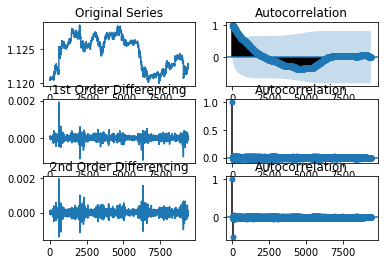

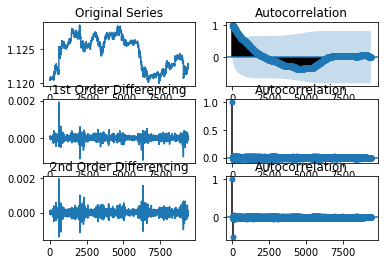

In [64]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(df.Close)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(df.Close), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(df.Close))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(df.Close)), ax=axes[2, 1])

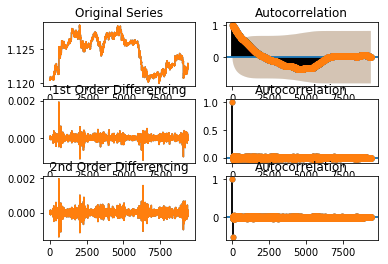

In [67]:
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(df.Close)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(df.Close), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(df.Close))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(df.Close)), ax=axes[2, 1])

In [69]:
from pmdarima.arima.utils import ndiffs

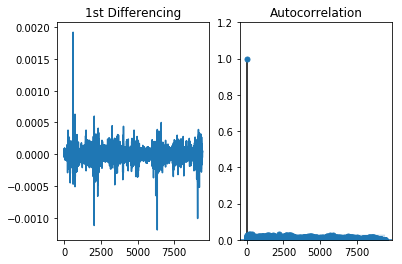

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Import data

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Close.diff().dropna(), ax=axes[1])

plt.show()

In [73]:
from statsmodels.tsa.arima_model import ARIMA


In [78]:
model = ARIMA(df.Close.diff().dropna(), order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 9416
Model:                 ARIMA(1, 1, 2)   Log Likelihood               74526.131
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 22 Jul 2019   AIC                        -149042.262
Time:                        23:40:46   BIC                        -149006.511
Sample:                             1   HQIC                       -149030.124
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.452e-09   1.65e-08     -0.210      0.834   -3.57e-08    2.88e-08
ar.L1.D.Close    -0.5964      0.053    -11.300      0.000      -0.700      -0.493
ma.L1.D.Close    -0.4421      0.048     

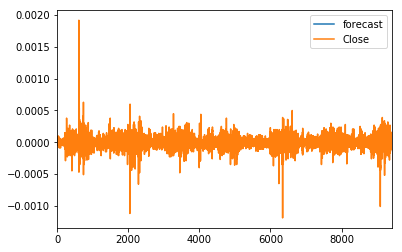

In [79]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [86]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.Close[:-10]
test = df.Close[-10:]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


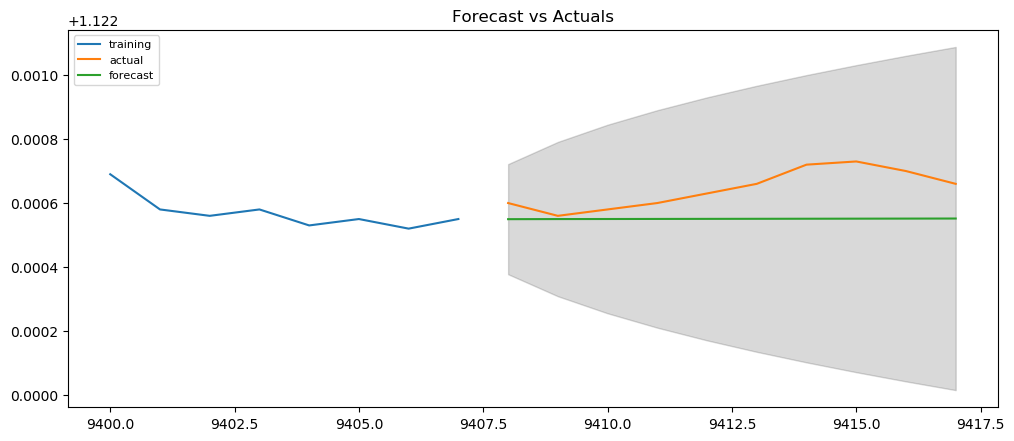

In [98]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[9400:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 9406
Model:                 ARIMA(3, 2, 1)   Log Likelihood               74305.205
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 22 Jul 2019   AIC                        -148598.410
Time:                        23:49:51   BIC                        -148555.516
Sample:                             2   HQIC                       -148583.846
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.173e-09    6.3e-08     -0.019      0.985   -1.25e-07    1.22e-07
ar.L1.D2.Close    -0.0645      0.009     -7.558      0.000      -0.081      -0.048
ar.L2.D2.Close    -0.0364      0.009

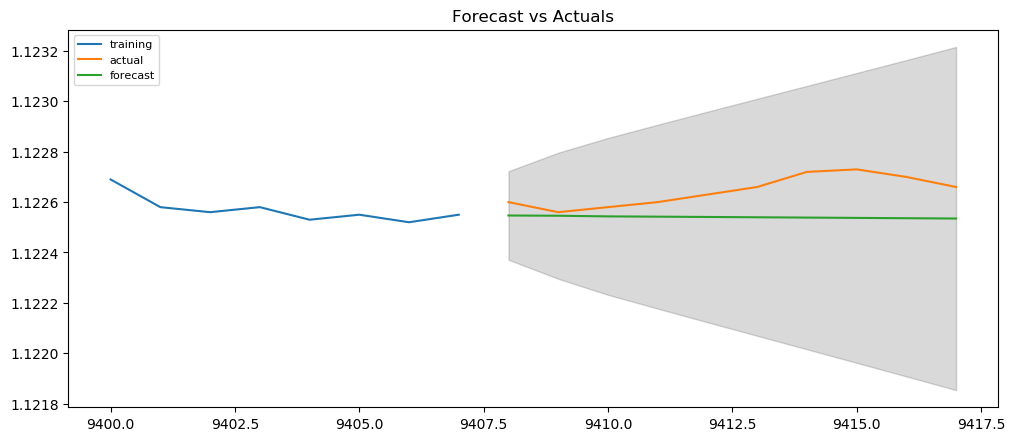

In [100]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[9400:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [111]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(df.Close, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Fit ARIMA: order=(1, 1, 1); AIC=-149189.700, BIC=-149161.099, Fit time=1.058 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-149190.343, BIC=-149176.042, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-149191.520, BIC=-149170.069, Fit time=0.097 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-149191.505, BIC=-149170.054, Fit time=0.134 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-149189.581, BIC=-149160.980, Fit time=0.182 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-149187.575, BIC=-149151.824, Fit time=1.330 seconds
Total fit time: 2.839 seconds


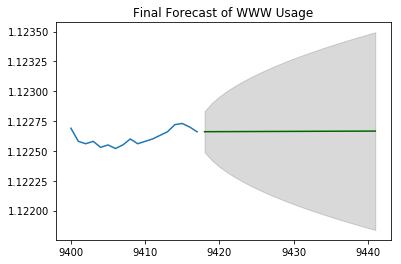

In [113]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Close), len(df.Close)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Close[9400:])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [104]:
df

,value
0,88
1,84
2,85
3,85
4,84
5,85
6,83
7,85
8,88
9,89
